#  1. Download the data from the file data source and provide possible data insights

In [45]:
import pandas as pd
import numpy as np

In [8]:
data = pd.read_csv('complaints.csv')


C:\Users\HP\AppData\Local\Temp\ipykernel_19652\436779030.py:1: DtypeWarning: Columns (4,5,6,11,16) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('complaints.csv')


In [9]:
data.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,05/10/2019,Checking or savings account,Checking account,Managing an account,Problem using a debit or ATM card,NaN,NaN,NAVY FEDERAL CREDIT UNION,FL,328XX,Older American,NaN,Web,05/10/2019,In progress,Yes,NaN,3238275
1,05/10/2019,Checking or savings account,Other banking product or service,Managing an account,Deposits and withdrawals,NaN,NaN,BOEING EMPLOYEES CREDIT UNION,WA,98204,NaN,NaN,Referral,05/10/2019,Closed with explanation,Yes,NaN,3238228
2,05/10/2019,Debt collection,Payday loan debt,Communication tactics,Frequent or repeated calls,NaN,NaN,CURO Intermediate Holdings,TX,751XX,NaN,NaN,Web,05/10/2019,Closed with explanation,Yes,NaN,3237964
3,05/10/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Old information reappears or never goes away,NaN,NaN,Ad Astra Recovery Services Inc,LA,708XX,NaN,NaN,Web,05/10/2019,Closed with explanation,Yes,NaN,3238479
4,05/10/2019,Checking or savings account,Checking account,Managing an account,Banking errors,NaN,NaN,ALLY FINANCIAL INC.,AZ,85205,NaN,NaN,Postal mail,05/10/2019,In progress,Yes,NaN,3238460


In [10]:
print(data.shape)
data.info()

(1282355, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1282355 entries, 0 to 1282354
Data columns (total 18 columns):
 #   Column                        Non-Null Count    Dtype 
---  ------                        --------------    ----- 
 0   Date received                 1282355 non-null  object
 1   Product                       1282355 non-null  object
 2   Sub-product                   1047189 non-null  object
 3   Issue                         1282355 non-null  object
 4   Sub-issue                     751169 non-null   object
 5   Consumer complaint narrative  383564 non-null   object
 6   Company public response       449082 non-null   object
 7   Company                       1282355 non-null  object
 8   State                         1262955 non-null  object
 9   ZIP code                      1167057 non-null  object
 10  Tags                          175643 non-null   object
 11  Consumer consent provided?    690654 non-null   object
 12  Submitted via               

In [11]:
data = data.drop('Complaint ID',axis=1)
data.shape

(1282355, 17)

In [12]:
data['Consumer disputed?'].value_counts()

Consumer disputed?
No     620123
Yes    148378
Name: count, dtype: int64

In [13]:
data = data[data['Consumer disputed?'].notna()]
data.shape

(768501, 17)

In [14]:
data['Consumer disputed?'] = np.where(data['Consumer disputed?']== 'Yes', 1, 0)
data['Consumer disputed?'].value_counts()

Consumer disputed?
0    620123
1    148378
Name: count, dtype: int64

In [15]:
column_list = [a for a in data]
# Column Name , Unique Value , Count of Nulls

for col in data.select_dtypes(['object']).columns:
    print(col,':',data[col].nunique(),':',data[col].isna().sum())

Date received : 1970 : 0
Product : 13 : 0
Sub-product : 50 : 235166
Issue : 99 : 0
Sub-issue : 61 : 455416
Consumer complaint narrative : 160982 : 604425
Company public response : 10 : 572792
Company : 4290 : 0
State : 62 : 5651
ZIP code : 18934 : 46569
Tags : 3 : 660542
Consumer consent provided? : 4 : 470584
Submitted via : 6 : 0
Date sent to company : 2049 : 0
Company response to consumer : 7 : 1
Timely response? : 2 : 0


# Function to explore how much catagorical feature is affecting the target


In [20]:
import seaborn as sns

In [21]:
def target_mean(data,feature,target,decimal=2):
    sns.countplot(data=data, y=feature, order = data[feature].value_counts().head(10).index,)
    return(data.groupby(feature).agg({target: "mean"}).sort_values(by=[target],ascending=[False]).round(decimal))

,Consumer disputed?
Company response to consumer,
Closed without relief,0.27
Closed with explanation,0.21
Closed,0.21
Closed with relief,0.13
Closed with non-monetary relief,0.12
Closed with monetary relief,0.11
Untimely response,0.00


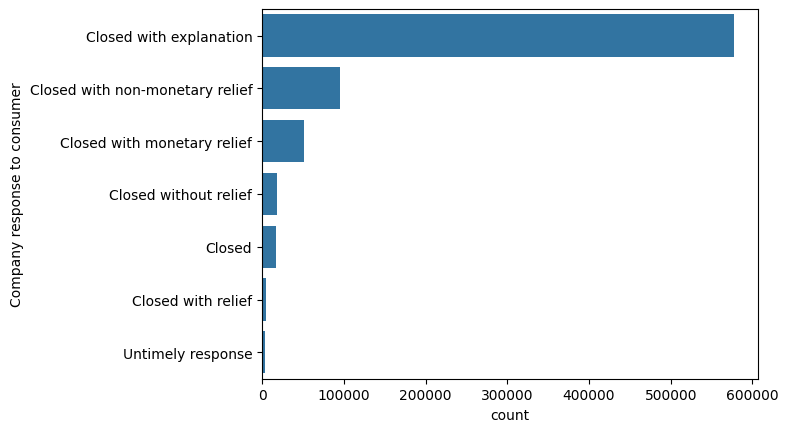

In [22]:
target_mean(data,'Company response to consumer','Consumer disputed?')

In [23]:
data = data.apply(lambda x: x.fillna(x.mean()) if x.dtype.kind in 'biufc' else x.fillna('Un'))

In [24]:
for col in data.select_dtypes(['object']).columns:
    print(col,':',data[col].nunique(),':',data[col].isna().sum())

Date received : 1970 : 0
Product : 13 : 0
Sub-product : 51 : 0
Issue : 99 : 0
Sub-issue : 62 : 0
Consumer complaint narrative : 160983 : 0
Company public response : 11 : 0
Company : 4290 : 0
State : 63 : 0
ZIP code : 18935 : 0
Tags : 4 : 0
Consumer consent provided? : 5 : 0
Submitted via : 6 : 0
Date sent to company : 2049 : 0
Company response to consumer : 8 : 0
Timely response? : 2 : 0


In [25]:
data['complain_length'] = data['Consumer complaint narrative'].str.count(' ') + 1

In [26]:
y_train = data['Consumer disputed?']
x_train = data.drop('Consumer disputed?',axis=1)
x_train.shape, y_train.shape

((768501, 17), (768501,))

In [30]:
from sklearn.model_selection import train_test_split
x_train1, x_train2 , y_train1, y_train2 =  train_test_split(x_train , y_train, test_size=0.25, random_state=42)

In [33]:
from catboost import CatBoostClassifier, Pool
categorical_features =  np.where(x_train.dtypes == object )[0]

model = CatBoostClassifier(iterations=50)
model.fit(x_train1, y_train1, cat_features=categorical_features,logging_level='Silent')
test_pred = model.predict_proba(x_train2)

feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)[-20:]

In [34]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train2,test_pred[:,1])

0.658786955661417

Text(0.5, 1.0, 'Feature Importances')

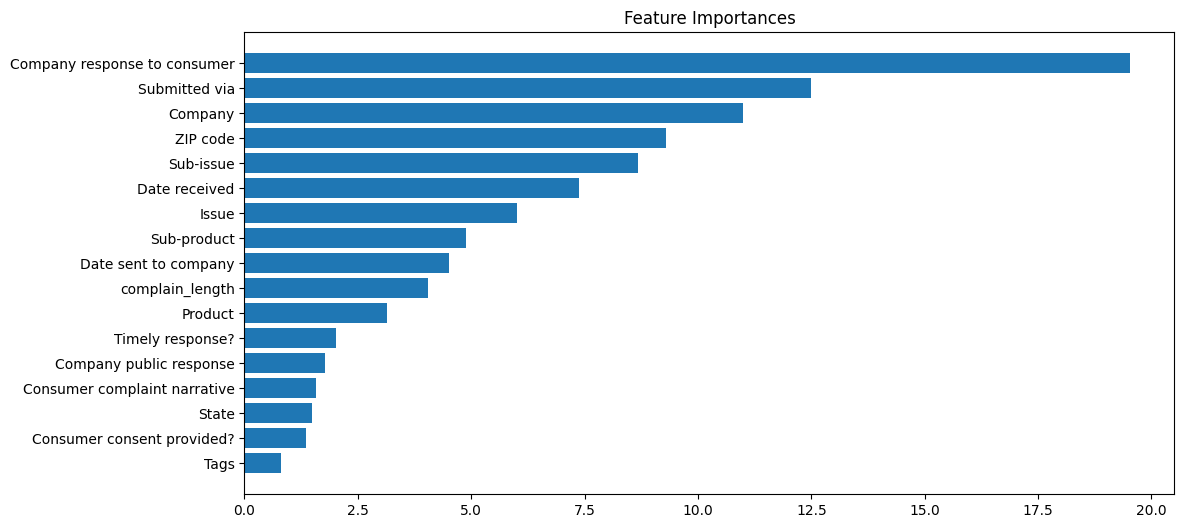

In [35]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(x_train2.columns)[sorted_idx])
plt.title('Feature Importances')

# 2. Given an unsorted array of integers, find the length of the longest continuous increasing subsequence (subarray). 

In [36]:
def find_length_of_LCIS(nums):
    if not nums:
        return 0

    max_length = 1
    current_length = 1

    for i in range(1, len(nums)):
        if nums[i] > nums[i - 1]:
            current_length += 1
            max_length = max(max_length, current_length)
        else:
            current_length = 1

    return max_length

In [37]:
## This function find_length_of_LCIS iterates through the array nums, keeping track of the current increasing sequence length current_length.

In [38]:
input1 = [1, 3, 5, 4, 7]
input2 = [2, 2, 2, 2, 2]

output1 = find_length_of_LCIS(input1)
output2 = find_length_of_LCIS(input2)


In [39]:
output1

3

In [40]:
output2

1

##  3. Given a list of non negative integers, arrange them such that they form the largest number.


In [41]:
def largest_number(nums):
    # Custom sorting key function
    def custom_sort_key(num):
        num_str = str(num)
        return num_str + num_str[::-1]  # Concatenate with its reverse to compare both orders

    # Sort the numbers using the custom sorting key
    sorted_nums = sorted(nums, key=custom_sort_key, reverse=True)

    # Join the sorted numbers to form the largest number
    largest_num = ''.join(map(str, sorted_nums))

    # If the largest number is "0", return "0"
    # Otherwise, return the largest number
    return largest_num if largest_num[0] != '0' else '0'


In [42]:
input1 = [10, 2]
input2 = [3, 30, 34, 5, 9]

output1 = largest_number(input1)
output2 = largest_number(input2)


In [43]:
print("Output 1:", output1)  
print("Output 2:", output2)  

Output 1: 210
Output 2: 9534330


# 4. Store all the "servlet-name", and "servlet-class" to a csv file from the attached sample_json.json file using Python

In [44]:
import json
import csv

# Read the JSON file
with open('C:\\Users\\HP\\Downloads\\sample_json.json', 'r') as file:
    data = json.load(file)

# Extract "servlet-name" and "servlet-class" pairs
servlet_data = [(servlet['servlet-name'], servlet['servlet-class']) for servlet in data['web-app']['servlet']]

# Write to CSV file
with open('servlet_data.csv', 'w', newline='') as csvfile:
    fieldnames = ['servlet-name', 'servlet-class']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for servlet_name, servlet_class in servlet_data:
        writer.writerow({'servlet-name': servlet_name, 'servlet-class': servlet_class})

print("Data has been successfully written to servlet_data.csv")


Data has been successfully written to servlet_data.csv
